<h2>Gathering Data</h2>

<h3>Python Packages used in the Project<h3>

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import re
import json
import matplotlib.pyplot as plt
%matplotlib inline 
import ggplot
# there was an issue important however the solution is found in 
#https://stackoverflow.com/questions/50591982/importerror-cannot-import-name-timestamp

/anaconda3/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


<h4>Loading the Image Prediction File</h4>

In [2]:
#Loading File

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
i_predictions=pd.read_csv(url, "\t")
i_predictions.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [3]:
#Saving File
i_predictions.info()
path = "./datasets/image-predictions.tsv"
i_predictions.to_csv(path, index=False, sep='\t', encoding='utf-8')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


<h4>Loading Twitter Archive Enhanced file from Udacity</h4>

In [4]:
# Loading File

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv"
t_archive = pd.read_csv(url)
t_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [5]:
# Saving file
t_archive.info()
path = "./datasets/twitter-archive-enhanced.csv"
t_archive.to_csv(path, index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

<h4>Loading information gathered from twitter app</h4>

<p>The main framework for the code shown bellow comes from the following <a href ="https://stackoverflow.com/questions/47612822/how-to-create-pandas-dataframe-from-twitter-search-api">link</a>, which is a stack overflow thread.; 
</p>

<p>There was an error in the first "<i>json.dumps</i>" json did not recognize the object type "Status" generated by tweepy. The solution for these problem was found in this <a href="https://stackoverflow.com/questions/27900451/convert-tweepy-status-object-into-json">link</a> belonging to another stack overlow thread.</p>

In [6]:
consumer_key = ' '
consumer_secret = ' '
access_token = ' '
access_secret = ' '

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)


In [7]:
list_of_tweets = []
cant_find_tweets_for_those_ids = []
for tweet_id in t_archive['tweet_id']:   
    try:
        list_of_tweets.append(api.get_status(tweet_id))
    except Exception as e:
        cant_find_tweets_for_those_ids.append(tweet_id)

Rate limit reached. Sleeping for: 640
Rate limit reached. Sleeping for: 638


In [8]:
my_list_of_dicts = []
for each_json_tweet in list_of_tweets:
    my_list_of_dicts.append(each_json_tweet)



In [9]:
#The save the dictionary in a txt file

with open('./datasets/tweet_json.txt', 'w') as file:
        file.write(json.dumps([json_tweet._json for json_tweet in my_list_of_dicts], indent=4))
        #This is where the TypeError  was generated
        

In [10]:
my_demo_list = []
with open('./datasets/tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        whole_tweet = each_dictionary['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        created_at = each_dictionary['created_at']
        whole_source = each_dictionary['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        my_demo_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'url': url,
                             'created_at': created_at,
                             'source': source,
                             'retweeted_status': retweeted_status,
                            })
        df_tweet_count = pd.DataFrame(my_demo_list, columns = ['tweet_id', 'favorite_count', 
                                                       'retweet_count', 'created_at',
                                                       'source', 'retweeted_status', 'url'])

In [11]:
#We save the final tweet_json dataset into a csv file for easy access.
df_tweet_count.info()
path = "./datasets/tweet_json.csv"
df_tweet_count.to_csv(path,index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 7 columns):
tweet_id            2341 non-null object
favorite_count      2341 non-null int64
retweet_count       2341 non-null int64
created_at          2341 non-null object
source              2341 non-null object
retweeted_status    2341 non-null object
url                 2341 non-null object
dtypes: int64(2), object(5)
memory usage: 128.1+ KB


In [12]:
t_archive = pd.read_csv('./datasets/twitter-archive-enhanced.csv')
i_predictions = pd.read_csv('./datasets/image-predictions.tsv', sep="\t")

<h4> Loading Tweet Jason File</h4>

In [13]:
df_tweet_count.head(3)

,tweet_id,favorite_count,retweet_count,created_at,source,retweeted_status,url
0,892420643555336193,38393,8431,Tue Aug 01 16:23:56 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,32887,6212,Tue Aug 01 00:17:27 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,24786,4111,Mon Jul 31 00:18:03 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy


<h4>Quality</h4>

<h5>Null Values</h5>

In [14]:
#Check for null values
i_predictions.isnull().values.any()

False

In [15]:
#Check for null values
t_archive["tweet_id"].isnull().values.any()

False

In [16]:
#Check for null values
t_archive["rating_numerator"].isnull().values.any()

False

In [17]:
#Check for null values
t_archive["rating_denominator"].isnull().values.any()

False

In [18]:
#Check for null values
df_tweet_count.isnull().values.any()

False

<p>No Null values are not found in main columns of twiter archive; columns rating_numerator and rating_denominator.</p>

<p>We will proceed to other observations.</p>

In [19]:
# Copy the dataframes
# w_ = working dataframe name

w_i_predictions = i_predictions.copy()
w_t_archive = t_archive.copy()
w_df_tweet_count = df_tweet_count.copy()

<h5>Twitter Archive Enhanced</h5>

<p>We will start by issues found within the data frame Twitter Archive Enhanced. </p>

<ul>
    <li><b>tweet_id:</b> The data type needs to be changed from int64 to object.</li>
    <li><b>in_reply_to_status_id:</b> erroneous data types.</li>
    <li><b>in_reply_to_user_id:</b> erroneous data types.</li>
    <li><b>name:</b> check if the name of the dog is the one mentioned in the tweet text. if it is not found remove it</li>
    <li><b>No retweets:</b> remove retweet data as well as columns associated with retweets.</li>
    <li><b>tweets with ratings with images.</b></li>
    <li><b>timestamp:</b> Change to datetime data type</li>
    <li><b>doggo, floofer, pupper, puppo:</b> change to one variable.</li>
    <li><b>rating:</b> Create a new column name rating which is the result of rating_numerator/rating_denomintor.</li>
</ul>

In [20]:
# tweet_id
w_t_archive.tweet_id = w_t_archive.tweet_id.astype(str)

# in_reply_to_status_id
w_t_archive.in_reply_to_status_id = w_t_archive.in_reply_to_status_id.astype(str)

# in_reply_to_user_id
w_t_archive.in_reply_to_user_id = w_t_archive.in_reply_to_user_id.astype(str)

# name
name = [] # list for whether the name is in text
## loop to find whether the name is found in the text
for i in range(len(w_t_archive["name"])):
    if "None" in w_t_archive["name"][i]:
        name.append("False")
    else:
        name.append("True")
## convert name into list
name = pd.Series(name)
## drop all entries where the name is not found in the tweet text
f_name = name[name == "False"]
i_f_name = f_name.index.values.tolist()
w_t_archive = w_t_archive.drop(w_t_archive.index[i_f_name])

# no retweets
w_t_archive = w_t_archive[w_t_archive.retweeted_status_id.isnull()]
w_t_archive = w_t_archive.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

# tweets with ratings with images
w_i_predictions.tweet_id = w_i_predictions.tweet_id.astype(str)
i_id = w_i_predictions[['tweet_id']]
w_t_archive = pd.merge(w_t_archive,i_id,on='tweet_id')

# change timestamp to datetime data type
w_t_archive.timestamp = pd.to_datetime(w_t_archive.timestamp)

# doggo, floofer, pupper, puppo
## replace None with " "
list = ["doggo","floofer","pupper","puppo"]
for i in list:
    w_t_archive[i] = w_t_archive[i].replace("None", "")
## replace with stage column and drop the columns
w_t_archive['stage']=w_t_archive.doggo.str.cat(w_t_archive.floofer).str.cat(w_t_archive.pupper).str.cat(w_t_archive.puppo)
w_t_archive=w_t_archive.drop(['doggo','floofer','pupper','puppo'],axis=1)
w_t_archive.stage=w_t_archive.stage.replace('',np.nan)

#rating
w_t_archive["rating"]= w_t_archive.rating_numerator/w_t_archive.rating_denominator

In [21]:
w_t_archive.head(6)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,rating
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,1.3
1,892177421306343426,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,1.3
2,891815181378084864,nan,nan,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,1.2
3,891689557279858688,nan,nan,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,1.3
4,891327558926688256,nan,nan,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,1.2
5,890971913173991426,nan,nan,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,1.3


<h5>Twitter Json</h5>

<p>We will fuse twitter_json with w_t_archive.</p>

In [22]:
# df3 - tweet_jason
df_tweet_count.tweet_id=df_tweet_count.tweet_id.astype(str)

df_tweet_count = df_tweet_count[~(df_tweet_count.tweet_id.duplicated())]
w_t_archive = pd.merge(w_t_archive,df_tweet_count,on='tweet_id')
w_t_archive[w_t_archive.tweet_id=='887473957103951883']
missingcount_id=w_t_archive.tweet_id[w_t_archive.retweet_count.isnull()]

w_t_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1447 entries, 0 to 1446
Data columns (total 18 columns):
tweet_id                 1447 non-null object
in_reply_to_status_id    1447 non-null object
in_reply_to_user_id      1447 non-null object
timestamp                1447 non-null datetime64[ns]
source_x                 1447 non-null object
text                     1447 non-null object
expanded_urls            1447 non-null object
rating_numerator         1447 non-null int64
rating_denominator       1447 non-null int64
name                     1447 non-null object
stage                    189 non-null object
rating                   1447 non-null float64
favorite_count           1447 non-null int64
retweet_count            1447 non-null int64
created_at               1447 non-null object
source_y                 1447 non-null object
retweeted_status         1447 non-null object
url                      1447 non-null object
dtypes: datetime64[ns](1), float64(1), int64(4), object(12)
m

In [23]:
#Drop columns rating_numerator and rating_denominator
w_t_archive=w_t_archive.drop(['rating_numerator','rating_denominator'],axis=1)

w_t_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source_x,text,expanded_urls,name,stage,rating,favorite_count,retweet_count,created_at,source_y,retweeted_status,url
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,NaN,1.3,38393,8431,Tue Aug 01 16:23:56 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,NaN,1.3,32887,6212,Tue Aug 01 00:17:27 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,nan,nan,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,NaN,1.2,24786,4111,Mon Jul 31 00:18:03 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy


In [24]:
missingcount_id.head()

Series([], Name: tweet_id, dtype: object)

<h5>Image Predictions</h5>

<p>We will start by issues found within the data frame Image Predictions. </p>

<ul>
    <li><b>p1:</b> Some of the breeds predicted are not breeds. Therefore we will find whether the breeds predicted belong from a list made.</li>
    <li><b>p2:</b> Some of the breeds predicted are not breeds. Therefore we will find whether the breeds predicted belong from a list made.</li>
    <li><b>p3:</b> Some of the breeds predicted are not breeds. Therefore we will find whether the breeds predicted belong from a list made.</li> 
</ul>

In [25]:
breeds = ["Affenpinscher","Afghan_Hound","Afghan_Shepherd","Aidi","Airedale_Terrier",
"Akbash","Akita","Alno_Espanol","Alaskan_Husky","Alaskan_Klee_Kai","Alaskan_Malamute",
"Alaunt","Alopekis","Alpine_Dachsbracke","Alpine_Mastiff","Apine_Spaniel","American_Akita",
"American_Bulldog","American_Cocker_Spaniel","American_English_Coonhound","American_Eskimo_Dog",
"American_Foxhound","American_Hairless_Terrier","American_Pit_Bull_Terrier","American_Staffordshire_Terrier",
"American_water_Spaniel","Anatolian_Shepherd_Dog","Andalusian_Hound","Anglo-Francais_de_Petite_Venerie",
"Appenzeller_Sennenhun","Braque_dlAriege","Ariegeois","Armant","American_Gampr_Dog","Artois_Hound",
"Australian_Cattle_Dog","Australian_Kelpie","Australian_Shepherd","Australian_Silky_Terrier",
"Australian_Stumpy_Tail_Cattle_Dog","Australian_Terrier","Austrian_Black_and_Tan_Hound","Bernese_Mountain_Dog",
"Austrian_Pinscher","Azawakh","Bakharwal_Dog","Barbet","Basenji","Basque_Shepherd_Dog","Basset_Artesian_Normand",
"Basset_Bleu_de_Gascogne","Basset_Fauve_de_Bretagne","Basset_Griffon_Vendeen_Grand","Basset_Griffon_Vendeen_Petit",
"Basset_Hound","Bavarian_Mountain_Hound","Beagle","Beagle-harrier","Bearded_Collie","Beauceron","Bedlington_Terrier",
"Belgian_Shepherd_Dog","Groenendael","Laekenois","Malinois","Tervuren","Bergamasco_Shepherd","Berger_Blanc_Suisse",
"Berger_Picard","Bermese_Mountain_Dog","Bichon_Frise","Billy","Black_and_Tan_Coonhound","Black_and_Tan_Virginia_Foxhound",
"Black_Norwegian_Elkhound","Black_Russian_Terrier","Black_Mouth_Cur","Bleu_de_Gascogne,_Grand","Bleu_de_Gascogne,_Petit",
"Bloodhound","Blue_Heeler","Blue_Lacy","Blue_Paul_Terrier","Blue_Picardy_Spaniel","Bluetick_Coonhound","Boerboel","Bohemian_Shepherd",
"Bolognese","Border_Collie","Border_Terrier","Borzoi","Bosnian_Coarse-haired_Hound","Boston_Terrier","Bouvier_des_Ardennes",
"Bouvier_des_Flandres","Boxer","Boykin_Spaniel","Bracco_Italiano","Braque_dAuvergne","Braque_du_Bourbonnais","Braque_du_Puy",
"Braque_Francais","Braque_Saint-Germain","Brazilian_Dogo","Brazilian_Terrier","Briard","Briquet_Griffon_Vendeen","Britanny","Broholmer",
"Bruno_Jura_Hound","Bucovina_Shepherd_Dog","Bull_and_terrier","Bull_Terrier","Bulldog","Bullenbeisser","Bullmastiff","Bully_Kutta",
"Burgos_Pointer","Cairn_Terrier","Canaan_Dog","Canadian_Eskimo_Dog","Cane_Corso","Cantabrian_Water_Dog","Cao_da_Serra_de_Aires",
"Cap_de_Castro_Laboreiro","Cao_de_Gado_Transmontano","Cao_Fila_de_Sao_Miguel","Carolina_Dog","Carpathian_Shepherd_Dog","Catahoula_Leopard_Dog",
"Catalan_Sheepdog","Caucasian_Shepherd_Dog","Cavalier_King_Charles_Spaniel","Central_Asian_Shepherd_Dog","Cesky_Fousek","Cesky_Terrier",
"Chesapeake_Bay_Terrier","Chien_Francais_Blanc_et_Noir","Chien_Francais_Blanc_et_Orange","Chien_Francais_Tricolore","Chien-gris","Chihuahua",
"chilean_Fox_Terrier","Chinese_Chongqing_Dog","Chinese_Crested_Dog","Chinese_Imperial_Dog","Chinook","Chippiparai","Chow_Chow","Chow","Cierny_Sery",
"Cimeco_dellEtna","Clumber_Spaniel","Collie_Smooth","Combai","Cordoba_Fithing_Dog","Coton_de_Tulear","Cretan_Hound","Croatian_Sheepdog",
"Cumberland_Sheepdog","Curly-Coated_Retreiver","Cursinu","Czecholosvakian_Wolfdog","Dachshund","Dalmatian","Dandie_Dinmont_Terrier",
"Danish-Swidish_Farmdog","Deutsche_Bracke","Doberman_Pinscher","Dogo_Argentino","Dogo_Cubano","Dogue_de_Bordeaux","Drentse_Patrijshond",
"Drever","Dunker","Dutch_Shepherd","Dutch_Smoushond","East_Siberian_Laika","East_European_Shepherd","Elo","English_Cocker_Spaniel",
"English_Foxhound","Mastiff","English_Setter","English_Shepherd","English_Springer_Spaniel","English_Toy_terrier","English_Water_Spaniel",
"English_White_Terrier","Entlebucher_Mountain_Dog","Estonian_Hound","Estrela_Mountain_Dog","Eurasier","Eurohound","Field_Spaniel",
"Fila_Brasileiro","Finnish_Hound","Finnish_Lapphund","Finnish_Spitz","Flat-Coated_Retriever","Fox_Terrier,_Smooth","Fox_Terrier,_Wire",
"French_Brittany","French_Bulldog","French_Spaniel","Gaddi_Dog","Galgo_Espanol","Galician_Cattle_Dog","Garafian_Shepherd",
"Gascon_Saintongeois","Georgian_Shepherd_Dog","German_Longhaired_Pointer","German_Pinscher","German_Roughaired_Pointer",
"German_Shepherd_Dog","German_Shepherd","German_Shorthaired_Pointer","German_Spaniel","German_Splitz","German_Wirehaired_Pointer","Giant_Schnauzer",
"Glen_of_Imaal_terrier","Golden_Retriever","Gordon_Setter","Gran_mastin_de_Borinquen","Grand_Anglo_francais_Blanc_et_Noir",
"Grand_Anglo-Francais_Tricolore","Grand_Griffon_Vendeen","Great_Dane","Great_Pyrenees","Greater_Swiss_Mountain_Dog","Greek_Harehound",
"Greenland_Dog","Greyhound","Griffon_Bleu_de_Gascogne","griffon_Bruzellois","Griffon_Fauve_de_Bretagne","Griffon_Nivernais",
"Guatemalan_Dogo","Ha,iltonstovare","Hanoover_Hound","hare_Indian_Dog","Harrier","Havanese","Hawaiian_Poi_Dog","Himalayan_Sheepdog",
"Hokkaido","Hortaya_Borzaya","Hovawart","Huntaway","Hygenhund","Ibizan_Hound","Icelandic_Sheepdog","Indian_Pariah_Dog",
"Indian_Spitz","Irish_red_and_White_Setter","Irish_Setter","Irish_Terrier","Irish_Water_Spaniel","Irish_Wolfhound",
"Istrian_Coarse-haired_Hound","istrian_Short-haired_Hound","italian_Greyhound","jack_Russell_Terrier","Jagdterrier","Jamthund",
"Japanese_Chin","japanese_Spitz","Japanese_Terrier","kaikadi","Kai_Ken","Kangal_Dog","Kanni","Karakachan_Dog","Karelian_Bear_Dog",
"Karst_Shepherd","Keeshond","Kerry_Beagle","Kerry_Blue_Terrier","King_Charles_Spaniel","King_Shepherd","Kintamani","Kishu_Ken",
"Komondor","Kooikerhondje","Koolie","Korean_Jindo","Kromfohrlander","Kumaon_Mastiff","Kunming_Wolfdog","Kurdish_Dog","Kuri","Kuvasz",
"Kyi-Leo","Labrador_Husky","Labrador_Retreiver","Largotto_Romagnolo","Lakeland_Terrier","Lancashire_Heeler","Landseer",
"Lapponian_Herder","Leonberger","Lhasa_Apso","Lithuanian_Hound","Lowchen","Mackenzie_River_Husky","Magyar_Agar","Mahratta_Greyhound",
"Majorca_Ratter","Majorca_Shepherd_Dog","Maltese","Manchester_Terrier","Maremma_Sheepdog","Mcnab","Maxican_hairless_Dog",
"Miniature_Australian_Shepherd","Miniature_American_Shepherd","miniature_Fox_Terrier","Miniature_Poodle","Miniature_Pinscher","Miniature_Schnauzer",
"Miniature_Shar_Pei","Romanian_Mioritic_Shepherd_Dog","Molossus","Molossus_of_Epirus","Montenegrin_Mountain_Hound","Moscow_Watchdog",
"Moscow_Water_Dog","Mountain_Cur","Mucuchies","Mudhol_Hound","Mudi","Munsterlander,_Large","Munsterlander,_Small","Neapolitan_Mastiff",
"Newfoundland","New_Zealand_Heading_Dog","Norfolk_Spaniel","Norfolk_Terrier","Norrbottenspets","North_Country_Beagle",
"North_Country_Beagle","Northern_Inuit_Dog","Norwegian_Buhund","Norwegian_Elkhound","Norwegian_Lundehund","Norwich_Terrier",
"Nova_Scotia_Duck_Tolling_Retriever","Old_Croatian_Sighthound","Old_Danish_Pointer","Old_English_Sheepdog","Old_English_Terrier",
"Old_german_Shepherd_Dog","Old_Time_Farm_Shepherd","Olde_English_Bulldogge","Otterhound","Pachon_Navarro","Pandikona_Hunting_Dog",
"Paisly_Terrier","Papillon","Parson_Russel_Terrier","Patterdale_Terrier","Pekingese","Perro_de_Presa_Canario","Perro_de_Presa_Mallorquin",
"Peruvian_Hairless_Dog","Phalene","Pharaoh_Hound","Phu_Quoc_Ridgeback","Picardy_Spaniel","Plummer_Terrier","Plott_Hound","Podenco_Canario",
"Pointer","Poitevin","Polish_Greyhound","Polish_Hound","Polish_Hunting_Dog","Polish_Lowland_Sheepdog","Polish_Tatra_Sheepdog","Pomeranian",
"pont-Audemer_Spaniel","Poodle","Porcelaine","Portuguese_Podengo","Portuguese_Pointer","Portuguese_Water_Dog","Posavac_Hound",
"Prazsky_Krysarik","Pudelpointer","Pug","Puli","Pumi","Pungsan_Dog","Pyrenean_Mastiff","Pyrenean_Shepherd","Rafeiro_do_Alentejo",
"Rajapalayam","Rampur_Greyhound","Rastreador_Brasileiro","Ratonero_Bodeguero_Andaluz","Ratonero_Murciano_de_Huerta",
"Ratonero_Valenciano","Rat_Terrier","Redbone_Coonhound","Rhodesian_Ridgeback","Rottweiler","Russian_Spaniel","Russian_Tracker",
"Russo-European_Laika","Russel_Terroer","Saarloos_Wolfdog","Sabueso_Espanol","Sabueson_Fino_Colombiano","Saint-Usuge_Spaniel",
"Sakhalin_Husky","Saluki","Samoyed","Sapsali","Sarplaninac","Schapendoes","Schillerstovare","Schipperke","Standard_Schnauzer",
"Schweizer_Laufhund","Schwizerischer_Niederlaufhund","Scotch_Collie","Scottish_Deerhound","Scottish_Terrier","Sealyham_Terrier",
"Segugio_Italiano","Seppala_Siberian_Sleddog","Serbian_Hound","Serbian_tricolour_Hound","Seskar_Seal_Dog","Shar_Pei","Shetland_Sheepdog",
"Shiba_Inu","Shih_Tzu","Shikoku","Shiloh_Shepherd","Siberian_Husky","Silken_Windhound","Sinhala_Hound","Skye_Terrier","Sloughi",
"Slovak_Cuvac","Slovakian_Wirehaired_Pointer","Slovensky_Kopov","Smalandsstovare","Small_Greek_Domestic_Dog","Soft-Coated_Wheaten_Terrier",
"South_Russian_Ovcharka","Southern_Hound","Spanish_Mastiff","Spanish_Water_Dog","Spinone_Italiano","Sporting_Lucas_Terrier","St._Bernard",
"St._John's_Water_Dog","Stabyhoun","Staffordshire_Bull_Terrier","Stephens_Cur","Styrian_Coarse-haired_Hound","Sussex_Spaniel",
"Swedish_Vallhund","Tahltan_Bear_Dog","Taigan","Twaiwan_Dog","Talbot","Tamaskan_Dog","Teddy_Roosevelt_Terrier","Telomian","Tenterfield_Terrier",
"Terceira_Mastiff","Thai_Bangkaew_Dog","thai_Ridgeback","Tibetan_Mastiff","Tibetan_Spaniel","Tibetan_Terrier","Tornjak","Tosa","Toy_Bulldog",
"Toy_Fox_Terrier","Toy_Manchester_Terrier","Toy_Terrier","Toy_Trawler_Spaniel","Transylvanian_Hound","treeing_Cur","treeing_tennessee_Brindle",
"Treeing_Walker_Coonhound","Trigg_Hound","Tweed_water_Spaniel","Tyrolean_Hound","Cimarron_Uruguayo","Valencian_Ratter","Vanjari_Hound",
"Villano_de_las_Encartaciones","Vizsla","Volpino_Italiano","Waimaraner","Welsh_Corgi,_Cardigan","Welsh_Corgi,_Pembroke","Welsh_Sheepdog",
"Welsh_Springer_Spaniel","Welsh_Terrier","West_Highland_White_Terrier","West_Siberian_Laika","Westphalian_Dachsbracke","Wetterhoun",
"Whippet","White_Shepherd","Wirehaired_Pointing_Griffon","Wirehaired_Vizsla","Wiasi_Dog","Yorkshire_Terrier","Blenheim_Spaniel",
"Walker_Hound","Maltese_Dog","Malamute","Black-and-Tan_Coonhound","Chesapeake_Bay_Retriever","Curly-Coated_Retriever",
"Labrador_Retriever","Pembroke","Toy_Poodle","Saint_Bernard","Staffordshire_Bullterrier","German_Short_Haired_Pointer",
"Eskimo_Dog","English_Springer","Cocker_Spaniel","Doberman","Bull_Mastiff","Pekinese","Collie","Dingo","Japanese_Spaniel",
"Brittany_Spaniel","Weimaraner","Scotch_Terrier","Standard_Poodle","Mexican_Hairless","Wire_Haired_Fox_Terrier","African_Hunting_Dog",
"Silky_Terrier"]

print(len(breeds))


546


In [26]:
df_i_pre = i_predictions.copy()
for breed in range(len(df_i_pre["p1"])):
    b = df_i_pre["p1"][breed].lower().replace("_", " ").replace("-", " ")
    breeds=[x.lower().replace("_", " ").replace("-", " ") for x in breeds] 
    if b not in breeds:
        df_i_pre["p1"][breed]= np.nan

for breed in range(len(df_i_pre["p2"])):
    b = df_i_pre["p2"][breed].lower().replace("_", " ").replace("-", " ")
    breeds=[x.lower().replace("_", " ").replace("-", " ") for x in breeds] 
    if b not in breeds:
        df_i_pre["p2"][breed]= np.nan 
        
for breed in range(len(df_i_pre["p3"])):
    b = df_i_pre["p3"][breed].lower().replace("_", " ").replace("-", " ")
    breeds=[x.lower().replace("_", " ").replace("-", " ") for x in breeds] 
    if b not in breeds:
        df_i_pre["p3"][breed]= np.nan 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [27]:
df_i_pre.head(7)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,NaN,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,NaN,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,NaN,0.933012,False,NaN,0.045885,False,NaN,0.017885,False


<h4>Store Data</h4>

<p>The new clean datasets will be stored in new files.</p> 

In [28]:
w_t_archive.to_csv("./datasets/final_twitter-archive-enhanced.csv", index=False)
df_i_pre.to_csv("./datasets/final_image-predictions.csv", index=False)

<h4>Analyse and Visualize Data</h4>

In [29]:
w_t_archive.describe()

,rating,favorite_count,retweet_count
count,1447.000000,1447.000000,1447.000000
mean,1.192581,9000.928127,2609.447132
std,4.648617,11881.523847,3947.478723
min,0.200000,105.000000,20.000000
25%,1.000000,2149.500000,638.500000
50%,1.100000,4494.000000,1433.000000
75%,1.200000,11534.500000,3145.500000
max,177.600000,123018.000000,60162.000000


<h5>Count of breeds predicted in P1</h5>

In [30]:
df_i_pre.p1.value_counts()


golden_retriever               150
Labrador_retriever             100
Pembroke                        89
Chihuahua                       83
pug                             57
chow                            44
Samoyed                         43
toy_poodle                      39
Pomeranian                      38
cocker_spaniel                  30
malamute                        30
French_bulldog                  26
miniature_pinscher              23
Chesapeake_Bay_retriever        23
Siberian_husky                  20
Staffordshire_bullterrier       20
German_shepherd                 20
Shetland_sheepdog               18
Maltese_dog                     18
beagle                          18
Eskimo_dog                      18
Lakeland_terrier                17
Rottweiler                      17
Shih-Tzu                        17
kuvasz                          16
Italian_greyhound               16
West_Highland_white_terrier     14
Great_Pyrenees                  14
dalmatian           

In [31]:
p1_count = df_i_pre.p1.value_counts()
p1_count=p1_count[0:10]
p1_count = pd.DataFrame({"breed": p1_count.index,"count":p1_count.values})
p1_count.to_csv("./datasets/breed_p1_top10.csv", index=False)

<h5>Count of breeds predicted in P2</h5>

In [32]:
df_i_pre.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
collie                             27
Pembroke                           27
Eskimo_dog                         27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
miniature_pinscher                 20
Samoyed                            20
chow                               20
toy_terrier                        20
malinois                           20
Norwegian_elkhound                 19
Staffordshire_bullterrier          18
pug                                17
Irish_terrie

In [33]:
p2_count = df_i_pre.p2.value_counts()
p2_count=p2_count[0:10]
p2_count = pd.DataFrame({"breed": p2_count.index,"count":p2_count.values})
p2_count.to_csv("./datasets/breed_p2_top10.csv", index=False)

<h5>Count of breeds predicted in P3</h5>

In [34]:
df_i_pre.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
cocker_spaniel                    31
beagle                            31
toy_poodle                        29
Pomeranian                        29
Pekinese                          29
Pembroke                          27
Great_Pyrenees                    27
Chesapeake_Bay_retriever          27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
pug                               23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Shetland_sheepdog                 17
boxer                             16
Lakeland_terrier                  16
dingo                             15
s

In [35]:
p3_count = df_i_pre.p3.value_counts()
p3_count=p3_count[0:10]
p3_count = pd.DataFrame({"breed": p3_count.index,"count":p3_count.values})
p3_count.to_csv("./datasets/breed_p3_top10.csv", index=False)

<h5>Count of ratings</h5>

In [36]:
w_t_archive["rating"].value_counts()

1.200000      340
1.100000      317
1.000000      296
1.300000      180
0.900000      114
0.800000       77
0.700000       38
1.400000       21
0.600000       19
0.500000       16
0.300000       11
0.400000        8
0.200000        5
0.636364        1
2.700000        1
177.600000      1
7.500000        1
3.428571        1
Name: rating, dtype: int64

In [37]:
w_t_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source_x,text,expanded_urls,name,stage,rating,favorite_count,retweet_count,created_at,source_y,retweeted_status,url
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,NaN,1.3,38393,8431,Tue Aug 01 16:23:56 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,NaN,1.3,32887,6212,Tue Aug 01 00:17:27 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,nan,nan,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,NaN,1.2,24786,4111,Mon Jul 31 00:18:03 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,nan,nan,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,NaN,1.3,41726,8560,Sun Jul 30 15:58:51 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,nan,nan,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,NaN,1.2,39897,9286,Sat Jul 29 16:00:24 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3


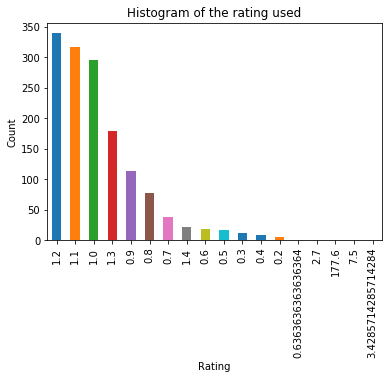

In [38]:
w_t_archive['rating'].value_counts().plot(kind = 'bar')
plt.title('Histogram of the rating used')
plt.xlabel('Rating')
plt.ylabel('Count')

fig = plt.gcf()
fig.savefig('./graphs/histogram_rating_count.png',bbox_inches='tight');

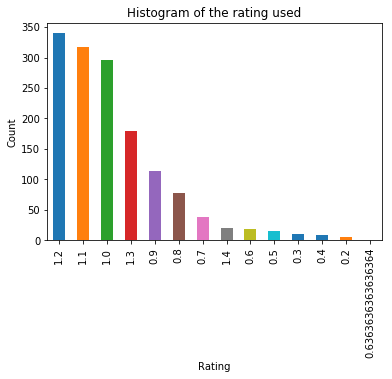

In [39]:
# Filtering extreme ratings
temp = w_t_archive.loc[w_t_archive["rating"] <= 2]
temp['rating'].value_counts().plot(kind = 'bar')
plt.title('Histogram of the rating used')
plt.xlabel('Rating')
plt.ylabel('Count')

fig = plt.gcf()
fig.savefig('./graphs/histogram_rating_count_ne.png',bbox_inches='tight');

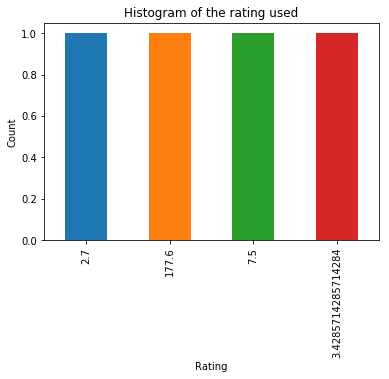

In [40]:
# Filtering extreme ratings
temp = w_t_archive.loc[w_t_archive["rating"] >= 2]
temp['rating'].value_counts().plot(kind = 'bar')
plt.title('Histogram of the rating used')
plt.xlabel('Rating')
plt.ylabel('Count')

fig = plt.gcf()
fig.savefig('./graphs/histogram_rating_count_e.png',bbox_inches='tight');

<h5>Gathering data from ratings, retweet count and favorite tweet</h5>

In [41]:
#Compile means per ratings

ratings=w_t_archive.rating.unique()
print("\nRatings in the Dataset")
print(ratings)
print("\n\nLengh of Unique Ratings")
print(len(ratings))
column_list = ["ratings","mean_retweet_count", "mean_favorite_count"]
df_mean_rating= pd.DataFrame(columns = column_list)
df_mean_rating["ratings"]= ratings
Temp = []
for i in ratings:
        Temp.append(w_t_archive.retweet_count.loc[w_t_archive["rating"] == i].mean())
df_mean_rating["mean_retweet_count"]= Temp
Temp = []
for i in ratings:
        Temp.append(w_t_archive.favorite_count.loc[w_t_archive["rating"] == i].mean())
df_mean_rating["mean_favorite_count"]= Temp
df_mean_rating.to_csv("./datasets/mean_ratings.csv", index=False, encoding='utf-8')


Ratings in the Dataset
[  1.3          1.2          1.4          0.5          1.1
   0.6          1.           3.42857143   7.5          2.7
   0.3          0.8          0.9          0.4          0.7
 177.6          0.63636364   0.2       ]


Lengh of Unique Ratings
18


In [42]:
print(df_mean_rating)

       ratings  mean_retweet_count  mean_favorite_count
0     1.300000         6171.883333         23031.155556
1     1.200000         3196.629412         11984.729412
2     1.400000        10043.428571         32207.047619
3     0.500000         1638.937500          5291.750000
4     1.100000         2100.552050          6634.482650
5     0.600000         1235.000000          3612.789474
6     1.000000         1357.851351          3922.706081
7     3.428571         1588.000000          5750.000000
8     7.500000         6758.000000         19641.000000
9     2.700000         1796.000000          7059.000000
10    0.300000          909.636364          2543.363636
11    0.800000          825.077922          2322.038961
12    0.900000          773.087719          2352.824561
13    0.400000         1154.125000          3296.625000
14    0.700000         1129.921053          3213.894737
15  177.600000         2670.000000          5445.000000
16    0.636364        18104.000000         39180

<h6>Images: Ratings vs Retweet Count</h6>

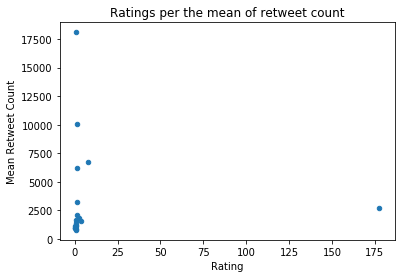

In [43]:
df_mean_rating.plot(x="ratings",y="mean_retweet_count",kind = 'scatter')
plt.title('Ratings per the mean of retweet count')
plt.xlabel('Rating')
plt.ylabel('Mean Retweet Count')

fig = plt.gcf()
fig.savefig('./graphs/scatter_plot_ratings_vs_mean_retweet_count.png',bbox_inches='tight')

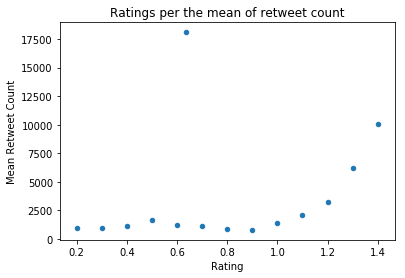

In [44]:
# Filtering extreme ratings
temp = df_mean_rating.loc[df_mean_rating["ratings"] <=2]
temp.plot(x="ratings",y="mean_retweet_count",kind = 'scatter')
plt.title('Ratings per the mean of retweet count')
plt.xlabel('Rating')
plt.ylabel('Mean Retweet Count')

fig = plt.gcf()
fig.savefig('./graphs/scatter_plot_ratings_vs_mean_retweet_count_ratings-bellow-2.png',bbox_inches='tight')

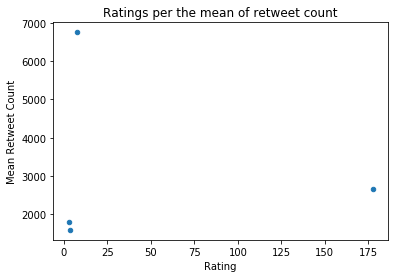

In [45]:
# Filtering extreme ratings
temp = df_mean_rating.loc[df_mean_rating["ratings"] >=2]
temp.plot(x="ratings",y="mean_retweet_count",kind = 'scatter')
plt.title('Ratings per the mean of retweet count')
plt.xlabel('Rating')
plt.ylabel('Mean Retweet Count')

fig = plt.gcf()
fig.savefig('./graphs/scatter_plot_ratings_vs_mean_retweet_count_ratings-above-2.png',bbox_inches='tight')

<h6>Images: Ratings vs Favorite Count</h6>

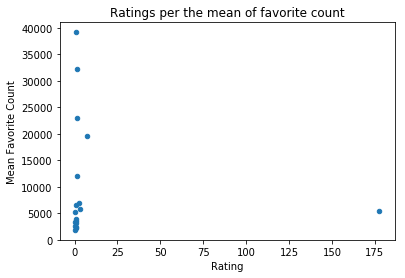

In [46]:
df_mean_rating.plot(x="ratings",y="mean_favorite_count",kind = 'scatter')
plt.title('Ratings per the mean of favorite count')
plt.xlabel('Rating')
plt.ylabel('Mean Favorite Count')

fig = plt.gcf()
fig.savefig('./graphs/scatter_plot_ratings_vs_mean_favorite_count.png',bbox_inches='tight')

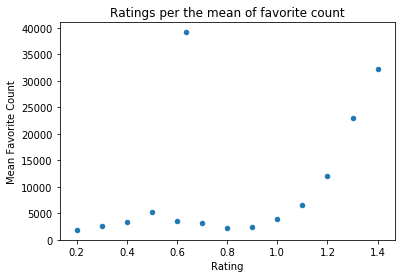

In [47]:
temp = df_mean_rating.loc[df_mean_rating["ratings"] <=2]
temp.plot(x="ratings",y="mean_favorite_count",kind = 'scatter')
plt.title('Ratings per the mean of favorite count')
plt.xlabel('Rating')
plt.ylabel('Mean Favorite Count')

fig = plt.gcf()
fig.savefig('./graphs/scatter_plot_ratings_vs_mean_favorite_count_bellow-2.png',bbox_inches='tight')

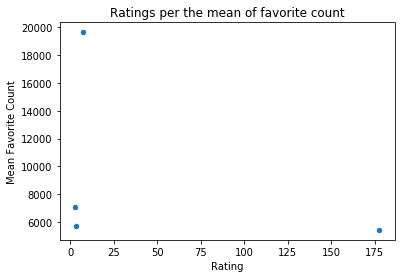

In [48]:
temp = df_mean_rating.loc[df_mean_rating["ratings"] >=2]
temp.plot(x="ratings",y="mean_favorite_count",kind = 'scatter')
plt.title('Ratings per the mean of favorite count')
plt.xlabel('Rating')
plt.ylabel('Mean Favorite Count')

fig = plt.gcf()
fig.savefig('./graphs/scatter_plot_ratings_vs_mean_favorite_count_above-2.png',bbox_inches='tight')

In [49]:
df_mr_b2 = df_mean_rating.loc[df_mean_rating["ratings"] <=2]
df_mr_b2.to_csv("./datasets/mean_ratings_bellow2.csv", index=False, encoding='utf-8')
df_mr_a2 = df_mean_rating.loc[df_mean_rating["ratings"] >=2]
df_mr_b2.to_csv("./datasets/mean_ratings_above2.csv", index=False, encoding='utf-8')
print(df_mr_a2)

       ratings  mean_retweet_count  mean_favorite_count
7     3.428571              1588.0               5750.0
8     7.500000              6758.0              19641.0
9     2.700000              1796.0               7059.0
15  177.600000              2670.0               5445.0
